In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2019_down1/2019_down1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down1/2019_down1_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down1/2019_down1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down1/2019_down1_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [14]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [15]:
article_contents = tokenized_doc.values.tolist()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [17]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [18]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [19]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [20]:
word2id = defaultdict(lambda: 0)

In [21]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [22]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [23]:
len(tf_idf_result)

4954

In [24]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4954


In [25]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [26]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"strategic" + 0.000*"jehmi" + 0.000*"health" + 0.000*"fair" + 0.000*"attend" + 0.000*"london" + 0.000*"dubai" + 0.000*"command"')
(1, '0.001*"comfort" + 0.001*"superbowl" + 0.001*"curious" + 0.001*"tripadvisor" + 0.001*"smell" + 0.001*"trustworthy" + 0.001*"reminiscent" + 0.001*"expectation"')
(2, '0.000*"unrelated" + 0.000*"naysayer" + 0.000*"resilience" + 0.000*"criticism" + 0.000*"shake" + 0.000*"summarize" + 0.000*"fellow" + 0.000*"justin"')
(3, '0.001*"jordan" + 0.001*"grishin" + 0.001*"shenzhen" + 0.001*"collective" + 0.001*"breathe" + 0.001*"showboating" + 0.001*"sluggish" + 0.001*"texan"')


In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [28]:
sentences = article_contents

In [29]:
from gensim.models import Word2Vec

In [30]:
model = Word2Vec(sentences, min_count=1)

In [31]:
len(model.wv.vocab)

4954

In [32]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [33]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [34]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [35]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [36]:
temp_cluster_result['cluster'] = assigned_clusters

In [37]:
temp_cluster_result['raw_data'] = X.tolist()

In [38]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [39]:
from sklearn.metrics import pairwise_distances

In [40]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [41]:
len(cosine_centroid_list)

4954

In [42]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [43]:
sum(temp_distance[3])

16.16078007914035

In [44]:
import scipy.spatial.distance as dist

In [45]:
dist.cosine(X[0],cosine_centroid_list[0])

7.695083674874592e-05

In [46]:
dist.euclidean(X[0],cosine_centroid_list[0])

2.1036807189669706

In [47]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [48]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [49]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
80,"[-0.4465964436531067, -0.6626526117324829, 0.5...",bitcoin,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000030,0.352365,0.647665,NaN
153,"[-0.44141507148742676, -0.6489313244819641, 0....",blockchain,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000032,0.254014,0.746018,NaN
39,"[-0.3852211534976959, -0.5693633556365967, 0.4...",crypto,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000035,0.204485,0.795550,NaN
28,"[-0.35214951634407043, -0.5232632756233215, 0....",trade,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000042,0.162031,0.838011,NaN
334,"[-0.39650994539260864, -0.5863758325576782, 0....",company,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000033,0.154248,0.845785,NaN
36,"[-0.35726091265678406, -0.5396249890327454, 0....",market,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000045,0.154248,0.845797,NaN
76,"[-0.34274768829345703, -0.5203741192817688, 0....",cryptocurrency,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000038,0.147173,0.852865,NaN
213,"[-0.34292393922805786, -0.5157865285873413, 0....",exchange,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000046,0.137267,0.862779,NaN
167,"[-0.3443344235420227, -0.50876384973526, 0.393...",digital,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000077,0.135852,0.864226,NaN
168,"[-0.35394424200057983, -0.5204764008522034, 0....",currency,0,"[-0.03283498, -0.048764247, 0.03775078, -0.037...",0.000049,0.126653,0.873396,NaN


In [50]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2609,"[-0.018131736665964127, -0.027713363990187645,...",specify,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.015050,0.002830,1.012220,NaN
2435,"[-0.014921993017196655, -0.01408596895635128, ...",computation,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.030549,0.002123,1.028426,NaN
3364,"[-0.014704416505992413, -0.021320009604096413,...",appreciation,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.031157,0.002123,1.029035,NaN
496,"[-0.014624617993831635, -0.01998819224536419, ...",guard,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.031977,0.002123,1.029854,NaN
1514,"[-0.009200644679367542, -0.019700635224580765,...",council,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.035958,0.002123,1.033835,NaN
2316,"[-0.01242086198180914, -0.011302796192467213, ...",overview,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.038834,0.002123,1.036711,NaN
3859,"[-0.012667667120695114, -0.01675577647984028, ...",difference,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.041312,0.002123,1.039189,NaN
1846,"[-0.009340047836303711, -0.00862872414290905, ...",expertise,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.041487,0.001415,1.040072,NaN
1545,"[-0.01233951561152935, -0.016098342835903168, ...",wild,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.043651,0.001415,1.042236,NaN
4604,"[-0.010875794105231762, -0.01475310418754816, ...",environmental,1,"[-0.0045917174, -0.006559816, 0.004901831, -0....",0.044796,0.001415,1.043381,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4210,"[-0.0164797306060791, -0.0192661602050066, 0.0...",chamber,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.022307,0.002123,1.020184,NaN
573,"[-0.008574680425226688, -0.02147587388753891, ...",afternoon,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.023426,0.002123,1.021303,NaN
2347,"[-0.013251040130853653, -0.022853443399071693,...",ambassador,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.023707,0.001415,1.022292,NaN
3216,"[-0.01508769579231739, -0.013524171896278858, ...",calculation,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.026420,0.002123,1.024297,NaN
3877,"[-0.008607333526015282, -0.01378730870783329, ...",prioritize,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.029721,0.002123,1.027598,NaN
1730,"[-0.013990008272230625, -0.02163638174533844, ...",interval,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.030302,0.002123,1.028179,NaN
2629,"[-0.008968508802354336, -0.015587317757308483,...",optimal,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.033903,0.001415,1.032488,NaN
500,"[-0.006004053633660078, -0.014358116313815117,...",execute,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.034842,0.002123,1.032720,NaN
1527,"[-0.007398218847811222, -0.018868349492549896,...",overall,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.035931,0.002830,1.033101,NaN
137,"[-0.01316551212221384, -0.01679310016334057, 0...",exhaustion,2,"[-0.004378248, -0.006521608, 0.005437904, -0.0...",0.034734,0.001415,1.033319,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1631,"[-0.00532663194462657, -0.012910556048154831, ...",linda,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.063216,0.001415,1.061801,NaN
2897,"[-0.012319729663431644, -0.01239181961864233, ...",unsolved,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.066420,0.001415,1.065005,NaN
1929,"[-0.009234246797859669, -0.0054453350603580475...",switch,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.071455,0.000708,1.070747,NaN
4758,"[-0.010688508860766888, -0.005332327447831631,...",tune,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.074555,0.001415,1.073140,NaN
2083,"[-0.005697895772755146, -0.0064849467016756535...",comparable,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.079823,0.001415,1.078408,NaN
444,"[-0.002746633952483535, -0.008808400481939316,...",farm,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.092249,0.000708,1.091541,NaN
2288,"[-0.007195407059043646, -0.003971004858613014,...",darling,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.096987,0.000708,1.096279,NaN
4312,"[-0.010729825124144554, -0.007050682790577412,...",timestamped,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.100661,0.001415,1.099246,NaN
2056,"[-0.0087454067543149, -0.006466119084507227, 0...",glare,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.100881,0.000708,1.100174,NaN
3101,"[-0.001769976457580924, -0.008032978512346745,...",boon,3,"[-0.0029441046, -0.004478457, 0.0024912616, -0...",0.108126,0.001415,1.106711,NaN


In [53]:
y_km = temp_cluster_result['cluster'].values

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

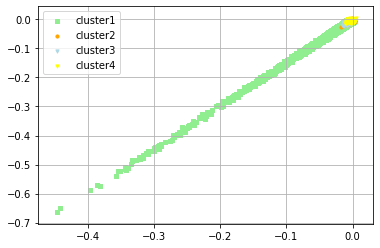

In [55]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 가격,거래소,암호화폐

3417

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

589

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 부정적

622

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

326

In [64]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 #  인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 2 # 부정적
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [65]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [67]:
kmeans.inertia_

79.22376251819708

In [68]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 0 1 ... 0 0 0]


In [69]:
cluster_values= list(model.wv.vocab)

In [70]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-79.22376


In [71]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [72]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7317664


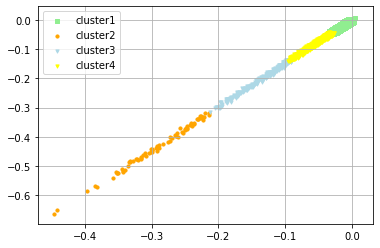

In [73]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [74]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [75]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [76]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [77]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [78]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [79]:
import scipy.spatial.distance as dist

In [80]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [81]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4394,"[-0.008205458521842957, -0.01251883152872324, ...",solar,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.025944,0.002123,1.023821,NaN
3793,"[-0.0049284384585917, -0.01757400669157505, 0....",scientific,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.025377,0.001415,1.023962,NaN
1424,"[-0.012760759331285954, -0.011120797134935856,...",watchdog,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026528,0.002123,1.024406,NaN
3569,"[-0.009509959258139133, -0.011689205653965473,...",gumbo,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.027380,0.002830,1.024550,NaN
2348,"[-0.007483100984245539, -0.011674565263092518,...",processor,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026729,0.002123,1.024606,NaN
2494,"[-0.012991040013730526, -0.010033081285655499,...",viewable,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026219,0.001415,1.024803,NaN
244,"[-0.007336786016821861, -0.015433654189109802,...",throw,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026303,0.001415,1.024888,NaN
2176,"[-0.011412976309657097, -0.009877069853246212,...",shortage,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026320,0.001415,1.024905,NaN
4726,"[-0.007939467206597328, -0.013437404297292233,...",badoo,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026386,0.001415,1.024971,NaN
3937,"[-0.01172390952706337, -0.013772491365671158, ...",vitalikbuterin,0,"[-0.00854045, -0.012638101, 0.009767074, -0.00...",0.026428,0.001415,1.025013,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
348,"[-0.29198402166366577, -0.4312364459037781, 0....",network,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.033692,0.072171,0.961521,NaN
85,"[-0.2886059284210205, -0.4293365180492401, 0.3...",high,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.041153,0.067218,0.973935,NaN
302,"[-0.29885539412498474, -0.44121479988098145, 0...",base,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.071383,0.091983,0.979400,NaN
471,"[-0.29368066787719727, -0.4372246265411377, 0....",platform,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.068073,0.087030,0.981044,NaN
742,"[-0.29264315962791443, -0.4372499883174896, 0....",technology,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.055155,0.073586,0.981569,NaN
23,"[-0.28965502977371216, -0.4369000196456909, 0....",move,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.050277,0.065803,0.984474,NaN
236,"[-0.3004382848739624, -0.4419228136539459, 0.3...",facebook,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.066454,0.078539,0.987915,NaN
181,"[-0.28314152359962463, -0.4238479733467102, 0....",project,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.066593,0.075709,0.990884,NaN
41,"[-0.292483925819397, -0.4473857879638672, 0.33...",accord,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.081560,0.067218,1.014341,NaN
518,"[-0.29921168088912964, -0.44528380036354065, 0...",fund,1,"[-0.2897008, -0.43122485, 0.33294466, -0.32767...",0.107484,0.080662,1.026822,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 사회적 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
257,"[-0.12908042967319489, -0.19825540482997894, 0...",concern,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.030782,0.029010,1.001772,NaN
78,"[-0.13413801789283752, -0.20323660969734192, 0...",image,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.034845,0.031840,1.003005,NaN
455,"[-0.13182958960533142, -0.1950625479221344, 0....",amount,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.028859,0.025472,1.003387,NaN
300,"[-0.13600388169288635, -0.19371172785758972, 0...",bull,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.037648,0.032548,1.005101,NaN
154,"[-0.13944685459136963, -0.19798919558525085, 0...",news,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.034893,0.029718,1.005176,NaN
58,"[-0.1393677443265915, -0.20190979540348053, 0....",june,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.034855,0.028302,1.006553,NaN
757,"[-0.1347103714942932, -0.19446468353271484, 0....",pair,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.031961,0.024765,1.007196,NaN
1060,"[-0.13498561084270477, -0.19697751104831696, 0...",development,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.036613,0.027595,1.009018,NaN
31,"[-0.12917950749397278, -0.1974143534898758, 0....",trader,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.037066,0.026887,1.010179,NaN
911,"[-0.1328408420085907, -0.20616719126701355, 0....",place,2,"[-0.133777, -0.19880615, 0.15368102, -0.151227...",0.038928,0.027595,1.011333,NaN


In [94]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2351,"[-0.052779410034418106, -0.07685443758964539, ...",entrepreneur,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.027092,0.009906,1.017186,NaN
439,"[-0.0546271987259388, -0.07908055931329727, 0....",donald,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.030248,0.012736,1.017512,NaN
1301,"[-0.05180886387825012, -0.0788758248090744, 0....",unit,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.028161,0.010613,1.017548,NaN
2768,"[-0.05163941904902458, -0.08388709276914597, 0...",monero,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.029827,0.012029,1.017798,NaN
64,"[-0.05322651565074921, -0.08097700774669647, 0...",bounce,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.030295,0.012029,1.018266,NaN
673,"[-0.0502019003033638, -0.08467997610569, 0.059...",side,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.029259,0.010613,1.018646,NaN
499,"[-0.04882470518350601, -0.0783117339015007, 0....",european,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.028654,0.009906,1.018749,NaN
1709,"[-0.05484531819820404, -0.07797514647245407, 0...",stock,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.029395,0.010613,1.018781,NaN
2206,"[-0.05558998882770538, -0.07757852971553802, 0...",advantage,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.029700,0.010613,1.019086,NaN
317,"[-0.05624988302588463, -0.08594600111246109, 0...",halve,3,"[-0.053549204, -0.0794836, 0.0615416, -0.06074...",0.029733,0.010613,1.019120,NaN


In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

4056

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #비즈

78

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈 

217

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

603

In [95]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [96]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.7317664 
temp_cluster_result['Silhouette'] = 0.7317664

In [97]:
temp_cluster_result1.to_csv("../cluster/en_news/2019_down1/en_news_2019_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2019_down1/en_news_2019_down1_cosine.csv")

In [85]:
word_vectors = model.wv

In [86]:
vocabs = word_vectors.vocab.keys()

In [87]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [88]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99707365


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [90]:
xys

array([[ 2.24330861e+00, -2.91459688e-03],
       [-7.56573932e-03, -9.89105840e-04],
       [ 3.12589504e+00, -9.26186556e-04],
       ...,
       [-2.18023903e-01, -3.92772352e-03],
       [-2.15767586e-01,  4.01767498e-04],
       [-2.29725685e-01,  2.08064777e-03]])

In [91]:
xys[:,0]

array([ 2.24330861, -0.00756574,  3.12589504, ..., -0.2180239 ,
       -0.21576759, -0.22972569])

In [92]:
xys[:,1]

array([-0.0029146 , -0.00098911, -0.00092619, ..., -0.00392772,
        0.00040177,  0.00208065])

In [93]:
xs = xys[:,0]
ys = xys[:,1]

In [94]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


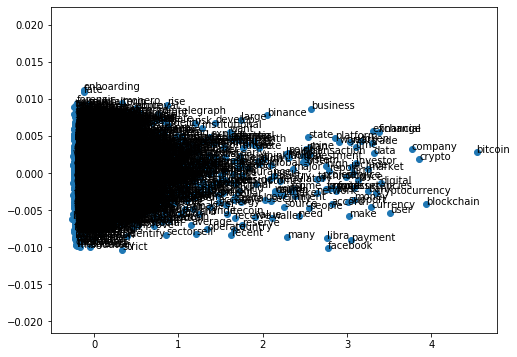

In [95]:
plot_2d_graph(vocabs,xs,ys)

In [96]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>